In [70]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

full = pd.read_csv("../../data/poptrag_lyrics_genres_corpus_filtered_english_lemmatized.csv")
full.info()

# top 20 most common words in the lyrics
# def print_most_common_words(corpus, lyrics_column, top_n=20):
#     vectorizer = CountVectorizer(
#                 ngram_range=(1, 1),
#                 token_pattern=r"\b[\w']+\b",
#                 lowercase=True,
#             )
#     matrix = vectorizer.fit_transform(full[lyrics_column])
#     sum_words = matrix.sum(axis=0)
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
#     words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
#     print(words_freq[:20])

# print_most_common_words(full, "full_lyrics")
# print("=" * 60)
# print_most_common_words(full, "lyrics_lemmatized")

<class 'pandas.DataFrame'>
RangeIndex: 111938 entries, 0 to 111937
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                111938 non-null  int64  
 1   track.s.id                111938 non-null  str    
 2   track.s.title             111937 non-null  str    
 3   track.s.firstartist.name  111938 non-null  str    
 4   album.s.title             111938 non-null  str    
 5   album.s.releaseyear       111938 non-null  int64  
 6   track.s.popularity        111938 non-null  int64  
 7   track.language            111938 non-null  str    
 8   full_lyrics               111938 non-null  str    
 9   cat5                      111938 non-null  str    
 10  pmax5                     111938 non-null  float64
 11  nmax5                     111938 non-null  float64
 12  cat12                     111938 non-null  str    
 13  pmax12                    111938 non-null  float64
 14 

In [71]:
from helpers.LyricsClassficationExperiment import LyricsClassificationExperiment

exp_fs = LyricsClassificationExperiment(
    corpus=full, 
    genrecol="cat12",
    lyricscol="full_lyrics", 
    artistcol="track.s.firstartist.name", 
    output_dir="cat5_mock_experiment_fs",
    test_size=0.2,
    random_state=42, 
    subsample_debug=0.05,
)
exp_fs.compute_fs_ngram_features(min_artists=20, top_n_per_genre_and_ngram=100)
fs_features = exp_fs.X_train.keys()
print(exp_fs)
print(type(exp_fs.X_train))
exp_fs.train_fixed_parametrer_logistic_regression()
exp_fs.show_model_evaluation()
exp_fs.show_top_coefficients_per_genre()

Extracted unigrams:
  - Unique: 21,575
  - Shape: (4458, 21575)
  - Examples: ['wives', 'colt', 'antibiotics', 'huckleberry', 'grams']
Extracted bigrams:
  - Unique: 194,350
  - Shape: (4458, 194350)
  - Examples: ['to department', "castaway i'll", 'all wanting', 'her lively', 'going unconditional']
Extracted trigrams:
  - Unique: 410,566
  - Shape: (4458, 410566)
  - Examples: ["things you've always", 'calling save me', 'air to soothe', 'working on the', 'hotter in your']
Calculating genre-level TF-IDF for unigrams with genre ...
Calculated TF-IDF for 51,624 genre-ngram pairs
Calculating genre-level TF-IDF for bigrams with genre ...
Calculated TF-IDF for 285,738 genre-ngram pairs
Calculating genre-level TF-IDF for trigrams with genre ...
Calculated TF-IDF for 467,138 genre-ngram pairs
Counting artists per n-gram...
  10% complete
  20% complete
  30% complete
  40% complete
  50% complete
  60% complete
  70% complete
  80% complete
  90% complete
Calculated artist diversity for 21,57

N:\Materialien\Promotion\LyricsGenreRecognition\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from helpers.LyricsClassficationExperiment import LyricsClassificationExperiment

exp_informed = LyricsClassificationExperiment(
    corpus=full,
    genrecol="cat12",
    lyricscol="lyrics_lemmatized",
    artistcol="track.s.firstartist.name",
    output_dir="cat5_mock_experiment_informed",
    test_size=0.2,
    random_state=42,
    subsample_debug=0.05,
)
exp_informed.compute_informed_ngram_features(min_artists=20, top_n_per_genre=300) # to be similar to FS (2014)
fs_features = exp_informed.X_train.keys()
print(exp_informed)
print(type(exp_informed.X_train))
exp_informed.train_fixed_parametrer_logistic_regression()
exp_informed.show_model_evaluation()

Step 1: Extracting and scoring n-grams per genre...
Extracted 167705 unique bigrams, 380098 unique trigrams
Filtered to 2006 n-grams (>= 20 artists, no stopwords)
Filtered to 417 n-grams (>= 20 artists, no stopwords)
Selected 311 bigrams and 227 trigrams across genres

Step 2: Replacing n-grams in corpus...

Step 3: Extracting unigrams from replaced corpus...
Extracted 1322 unigrams meeting criteria

Step 4: Ranking all tokens via TF-IDF...

Final vocabulary size: 1216
LyricsClassificationExperiment with 11 genres
Train size: 4458 samples
Test size: 1138 samples
# of features: 1216
Feature type: Informed N-grams (top 300 per genre, min. 20 artists)
Model not yet trained.
Output directory: cat5_mock_experiment_informed

<class 'pandas.DataFrame'>
Training pipeline with fixed parameters...
Selected model parameters:
  C: 1.000
  l1_ratio: 0.500
  target_ratio: 3.000
F1 macro: 0.212
Precision macro: 0.222
Recall macro: 0.222
Cohen's kappa: 0.158
                  precision    recall  f1-s

N:\Materialien\Promotion\LyricsGenreRecognition\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
exp_informed.show_top_coefficients_per_genre()

Top 10 coefficients for genre: ALTERNATIVE ROCK
i'm (0.500)
if you (0.452)
around (0.448)
were (-0.440)
sweet (0.439)
you see (-0.431)
you down (0.429)
for you i (0.419)
can you (0.419)
all the things (0.418)


Top 10 coefficients for genre: ELECTRONIC
me on the (-0.704)
ain't (-0.664)
i know i'm (0.661)
on your (-0.642)
you ain't (-0.635)
all the (0.596)
looking for a (0.581)
all (-0.565)
you love me (0.558)
i don't want (-0.524)


Top 10 coefficients for genre: HARD ROCK
it's (0.499)
to feel (0.473)
feel the (0.444)
my soul (-0.392)
got me (0.386)
i got (0.385)
a new (-0.385)
in my mind (0.384)
you know that (0.383)
you go (0.382)


Top 10 coefficients for genre: HEAVY METAL
for (0.624)
i've (-0.542)
fire (0.525)
love (-0.518)
i guess (0.504)
i know it (0.504)
in my head (0.464)
see (0.461)
hard to (0.440)
the same (-0.432)


Top 10 coefficients for genre: HIP HOP
niggas (0.794)
nigga (0.746)
die (0.606)
i got (0.551)
you ain't (0.532)
in (0.509)
man (0.474)
shit (0.472)
em (0.470)
i

In [ ]:
# from helpers.LyricsClassficationExperiment import LyricsClassificationExperiment

# exp_lda = LyricsClassificationExperiment(
#     corpus=full,
#     genrecol="cat12",
#     lyricscol="lyrics_lemmatized",
#     artistcol="track.s.firstartist.name",
#     output_dir="cat5_mock_experiment_informed",
#     test_size=0.2,
#     random_state=42,
#     subsample_debug=0.2,
# )
# # DOES NOT WORK YET (OR BETTER: ANY MORE)
# exp_lda.compute_lda_features(range_of_topics=(2, 20), topics_step=3, min_artists=20, top_bigrams=10000, top_trigrams=10000)
# fs_features = exp_lda.X_train.keys()
# print(exp_lda)
# # print(type(exp_lda.X_train))
# # exp_lda.train_fixed_parametrer_logistic_regression()
# # exp_lda.show_model_evaluation()

Extracting bigrams and trigrams...
Extracted 470461 unique bigrams, 1303691 unique trigrams
Filtering by artist diversity and stopwords...
Filtered to 9834 n-grams (>= 20 artists, no stopword-only)
Filtered to 4330 n-grams (>= 20 artists, no stopword-only)
Scoring bigrams with LLR...
Scoring trigrams with LLR...
Selecting top n-grams...
Selected 9834 bigrams and 4330 trigrams
Building vocabulary from replaced corpus...
Final vocabulary size: 14164
Aggregating lyrics by artist before replacing n-grams...
Fitting LDA models and evaluating coherence...
Evaluating 2 topics (model 1/7)...
Evaluating 5 topics (model 2/7)...
Evaluating 8 topics (model 3/7)...
Evaluating 11 topics (model 4/7)...
Evaluating 14 topics (model 5/7)...
Evaluating 17 topics (model 6/7)...
Evaluating 20 topics (model 7/7)...
LyricsClassificationExperiment with 11 genres
Train size: 18210 samples
Test size: 4177 samples
# of features: 2
Feature type: LDA Topic probabilities (topics 2-20 step 3, min. 20 artists, top 10

In [ ]:
# features = exp_lda.lda_extractor.dictionary.values()

# underscore_count = sum(1 for feature in features if "_" in feature)
# print(f"Number of features containing '_': {underscore_count} out of {len(features)} ({round(underscore_count/len(features)*100)}%)")
# sample_features = [feature for feature in features][:10]
# print("Sample features containing '_':", sample_features)

# tokens = exp_lda.lda_extractor.collocations_extractor.transform(
#     full.rename(columns={"lyrics_lemmatized":"lyrics", "track.s.firstartist.name":"artist"}), aggregate_artists=True)

Number of features containing '_': 14152 out of 14152 (100%)
Sample features containing '_': ['a_bad', 'a_big', 'a_cold', 'a_dark', 'a_day', 'a_different', 'a_face', 'a_feeling', 'a_fool_i', 'a_friend']
Aggregating lyrics by artist before replacing n-grams...


104.0
518.0


<Axes: >

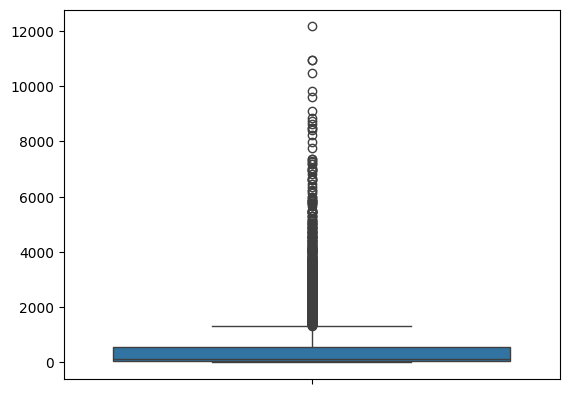

In [ ]:
# import pandas as pd
# import numpy as np
# from seaborn import boxplot

# n_tokens_per_doc = [len(tokens[i]) for i in range(len(tokens))]
# n_tokens_per_doc = pd.Series(n_tokens_per_doc)
# print(np.median(n_tokens_per_doc))
# quantiles = np.quantile(n_tokens_per_doc, (0.25, 0.75))
# iqr = quantiles[1] - quantiles[0]
# print(iqr)

# boxplot(n_tokens_per_doc)

In [ ]:
# print(exp_lda.lda_extractor.coherence_scores)
# exp_lda.lda_extractor.model.print_topics()

{2: np.float64(-0.041504923044619405), 5: np.float64(-0.070780500915634), 8: np.float64(-0.10653424598074088), 11: np.float64(-0.11465927861889362), 14: np.float64(-0.12457342057515461), 17: np.float64(-0.1451215683027971), 20: np.float64(-0.16482591714217545)}


[(0,
  '0.003*"like_a" + 0.001*"try_to" + 0.001*"ooh_ooh_ooh" + 0.001*"get_a" + 0.001*"i_get" + 0.001*"like_the" + 0.001*"no_one" + 0.001*"see_the" + 0.001*"tell_me" + 0.001*"let_me"'),
 (1,
  '0.003*"like_a" + 0.002*"oh_oh_oh" + 0.002*"na_na_na" + 0.001*"get_a" + 0.001*"the_world" + 0.001*"get_me" + 0.001*"i_get" + 0.001*"try_to" + 0.001*"too_much" + 0.001*"i_know"')]

In [ ]:
# exp_lda.train_fixed_parametrer_logistic_regression()
# exp_lda.show_model_evaluation()

Training pipeline with fixed parameters...
Selected model parameters:
  C: 1.000
  l1_ratio: 0.500
  target_ratio: 3.000
F1 macro: 0.070
Precision macro: 0.055
Recall macro: 0.055
Cohen's kappa: 0.025
                  precision    recall  f1-score   support

alternative rock       0.00      0.00      0.00       171
      electronic       0.00      0.00      0.00       421
       hard rock       0.00      0.00      0.00        88
     heavy metal       0.00      0.00      0.00       180
         hip hop       0.00      0.00      0.00       327
      indie rock       0.00      0.00      0.00       108
            jazz       0.00      0.00      0.00        78
           metal       0.00      0.00      0.00       375
             pop       0.25      0.52      0.34       947
        pop rock       0.00      0.00      0.00        73
            rock       0.35      0.55      0.43      1409

        accuracy                           0.30      4177
       macro avg       0.05      0.10      

N:\Materialien\Promotion\LyricsGenreRecognition\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
N:\Materialien\Promotion\LyricsGenreRecognition\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
N:\Materialien\Promotion\LyricsGenreRecognition\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 